<h1 style="text-align: center; font-size: 1000%; text-decoration: underline;">Lab 5<h1>
<h2 style="text-align: center; font-size: 250%;">Ido Israeli (ID - 212432439)<br>Jonathan Derhy (ID - 315856377)<h2>

In [885]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<h2>Question 1<h2>

Only loading the Xtrain and Ytrain files as we'll load the rest when they're needed.

In [886]:
Xtrain = np.loadtxt('.\External\Data\Xtrain.txt', delimiter=',', skiprows=0)
Ytrain = np.loadtxt('.\External\Classifications\Ytrain.txt', delimiter=',', skiprows=0)

In [887]:
Xtest = np.loadtxt('.\External\Data\Xtest.txt', delimiter=',', skiprows=0)
Ytest = np.loadtxt('.\External\Classifications\Ytest.txt', delimiter=',', skiprows=0)

<h2>Question 2<h2>

In [888]:
def drawGroups(X, Y, color_0, color_1, Title):
    c = []
    for y in Y:
        c.append(color_0 if y == 0 else color_1)

    df = pd.DataFrame({'x': X[:,0],
                      'y': X[:,1],
                      'Color': c})
    testValues = df.groupby('Color')
    for name, group in testValues:
        plt.scatter(group.x, group.y, 10, color=name, label=name)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(Title)
    return

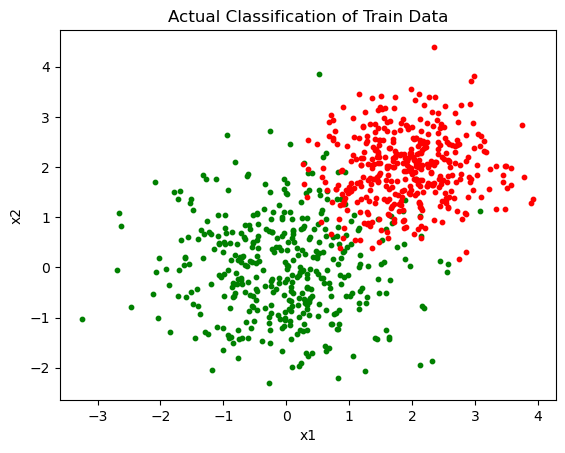

In [889]:
drawGroups(Xtrain, Ytrain, 'g', 'r', "Actual Classification of Train Data")

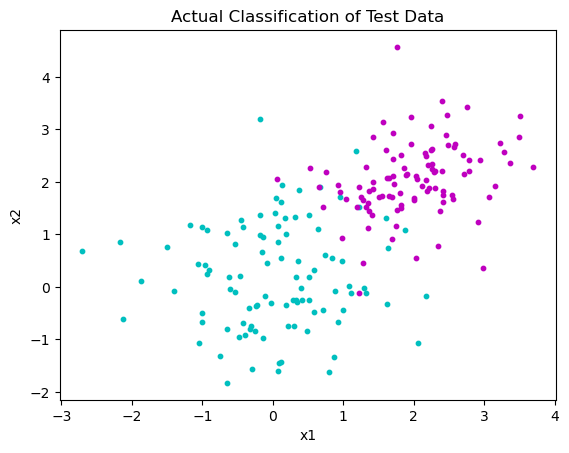

In [890]:
drawGroups(Xtest, Ytest, 'c', 'm', "Actual Classification of Test Data")

<h2>Question 3<h2>

In [891]:
W = np.loadtxt('.\External\Coefficients\Coefficients.txt', delimiter=',', skiprows=1)
print('w0 = '+ str(W[0]))
print('W = '+ str(W[1:]))

w0 = -0.85
W = [1.32 1.24]


<h2>Question 4<h2>

In [892]:
def innerProduct(W, x):
    """
    This Function
    """
    return np.matmul(W[1:], x) + W[0]

In [893]:
def classify(W, X):
    """
    This Function
    """
    Ypredicted = []
    for x in X:
        Ypredicted.append(0.0 if np.sign(innerProduct(W, x)) == -1 else 1.0)
    return Ypredicted

In [894]:
def drawClassification(W, X, Y, color_0, color_1, Title):
    c = []
    for y in Y:
        c.append(color_0 if y == 0 else color_1)

    df = pd.DataFrame({'x': X[:,0],
                      'y': X[:,1],
                      'Color': c})
    testValues = df.groupby('Color')
    for name, group in testValues:
        plt.scatter(group.x, group.y, 8, color=name, label=name)
    expression = -(W[0]+W[1]*X)/W[2]
    plt.plot(X, expression, 'k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(Title)
    return

<h2>Question 5<h2>

In [895]:
def accuracyNaively(actualY, predictedY):
    """
    This Function
    """
    count = 0
    for pred_y, act_y in zip(predictedY, actualY):
        if pred_y == act_y:
            count+=1
    return (count*100)/len(actualY)

In [896]:
def accuracy(actualY, predictedY):
    """
    This Function
    """
    return 100*(predictedY == actualY).mean()

In [897]:
predictedTrainY = classify(W, Xtrain)

In [898]:
trainAccuracy1 = accuracy(Ytrain, predictedTrainY)
print(str(trainAccuracy1)+'%')

85.375%


In [899]:
trainAccuracy2 = accuracyNaively(Ytrain, predictedTrainY)
print(trainAccuracy1 - trainAccuracy2)

0.0


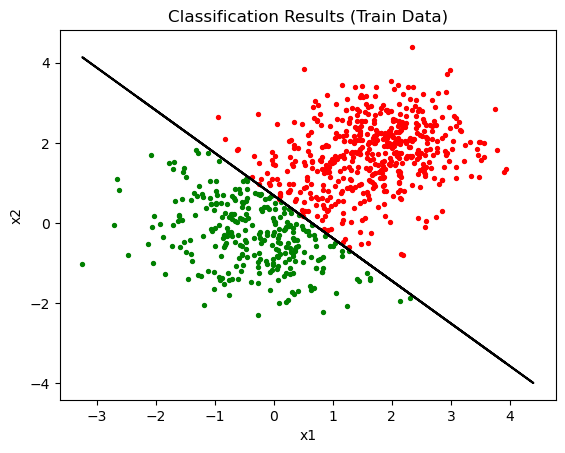

In [900]:
drawClassification(W, Xtrain, predictedTrainY, 'g', 'r', "Classification Results (Train Data)")

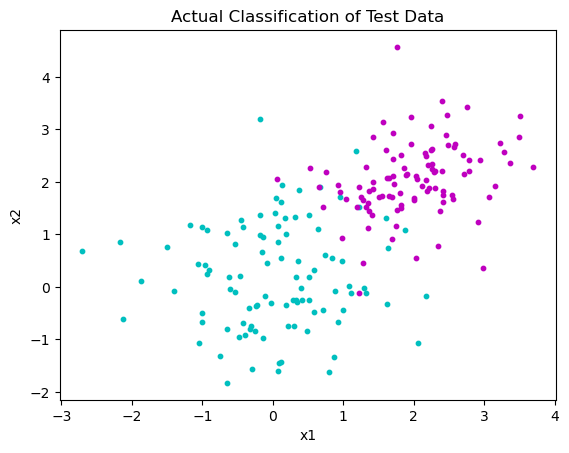

In [901]:
drawGroups(Xtest, Ytest, 'c', 'm', "Actual Classification of Test Data")

In [902]:
predictedTestY = classify(W, Xtest)

In [903]:
testAccuracy1 = accuracyNaively(Ytest, predictedTestY)
print(str(testAccuracy1)+'%')

80.5%


In [904]:
testAccuracy2 = accuracy(Ytest, predictedTestY)
print(testAccuracy1 - testAccuracy2)

0.0


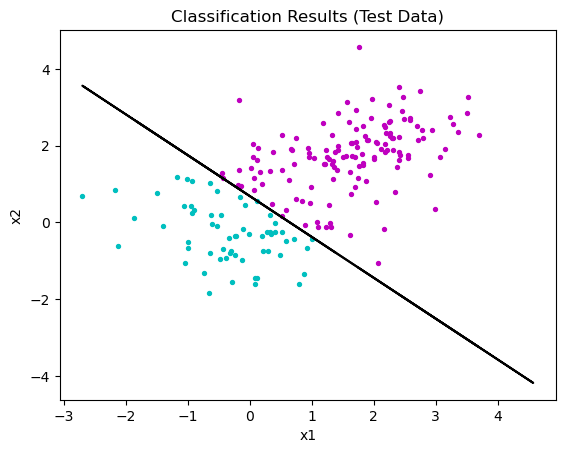

In [905]:
drawClassification(W, Xtest, predictedTestY, 'c', 'm', "Classification Results (Test Data)")

<h2>Question 6<h2>

<h3>Trying to improve the Classification of the Train<h3>

94.625%


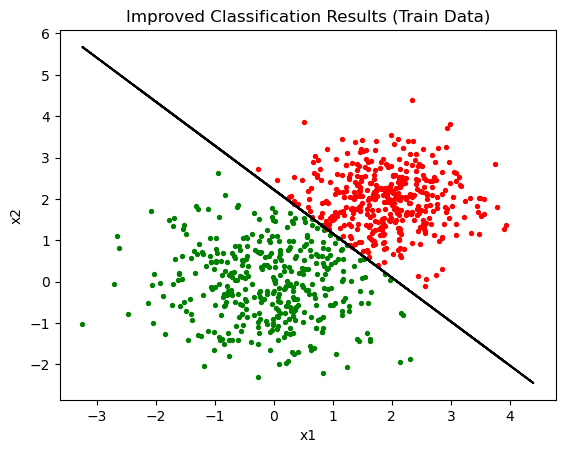

In [906]:
new_W = [W[0]-1.9085, W[1], W[2]]
improvedPredictedTrainY = classify(new_W, Xtrain)
drawClassification(new_W, Xtrain, improvedPredictedTrainY, 'g', 'r', "Improved Classification Results (Train Data)")
print(str(accuracy(Ytrain, improvedPredictedTrainY))+'%')

We tried eyeballing the first value, and we decided to deduct 1.5 from W[0]. Then we tried deducting 2.
From then on we used a meathod that roughly resembles 'Binary Search' -
we pick a value roughly in the middle of the interva [-2, -1.5], say -1.75,
and then we try classifing with W[0]-{a value that is in the interval [-2, -1.75]} and see wether we improved our accuracy or not. We then do the same but this time the value is from the interval [-1.75, -1.5].
Then we recalibrate our interval based on the better improvement, and repeat the entire process.

This is 100% not a good and efficient method but it did a rather good job, as we managed to improve our accuracy from 85.375% to 94.625%.

<h3>Trying to improve the Classification of the Test<h3>

94.0%


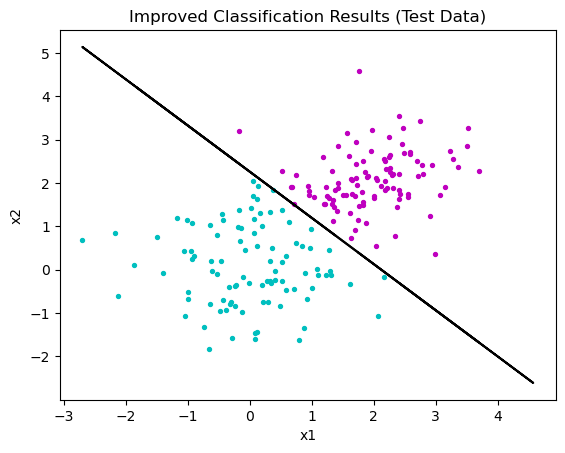

In [907]:
new_W = [W[0]-1.95, W[1], W[2]]
improvedPredictedTestY = classify(new_W, Xtest)
drawClassification(new_W, Xtest, improvedPredictedTestY, 'c', 'm', "Improved Classification Results (Test Data)")
print(str(accuracy(Ytest, improvedPredictedTestY))+'%')

We tried eyeballing the first value, and we decided to deduct 1.5 from W[0]. Then we tried deducting 2.
From then on we used a meathod that roughly resembles 'Binary Search' -
we pick a value roughly in the middle of the interva [-2, -1.5], say -1.75,
and then we try classifing with W[0]-{a value that is in the interval [-2, -1.75]} and see wether we improved our accuracy or not. We then do the same but this time the value is from the interval [-1.75, -1.5].
Then we recalibrate our interval based on the better improvement, and repeat the entire process.

This is 100% not a good and efficient method but it did a rather good job, as we managed to improve our accuracy from 80.5% to 94.0%.

In [908]:
W = new_W

<h2>Question 7<h2>

In [909]:
def confusionMatrix(actualY, predictedY):
    actualY = np.array(actualY)
    predictedY = np.array(predictedY)
    confusion_matrix = np.zeros([2, 2])
    values = [0, 1]
    for actual in values:
        for pred in values:
            # check both the * and the ==
            confusion_matrix[actual, pred] = ((actualY == actual)*(predictedY == pred)).sum()
    return confusion_matrix

In [910]:
print(f"\nConfusion Matrix of Xtrain:\n{str(confusionMatrix(Ytrain, classify(W, Xtrain)))}")


Confusion Matrix of Xtrain:
[[374.  26.]
 [ 21. 379.]]


In [911]:
print("\nConfusion Matrix of Xtest:\n" + str(confusionMatrix(Ytest, classify(W, Xtest))))


Confusion Matrix of Xtest:
[[92.  8.]
 [ 4. 96.]]


<h2>Question 8<h2>

In [912]:
def probabilisticLogRegClassifier(W, X):
    """
    This Function
    """
    return 1/(1+np.exp(-(X@W[1:] + W[0])))

<h2>Question 9<h2>

In [913]:
def finalClassification(prb_Ypredicted_equals_one, th):
    if th > 1 or th < 0:
        print("th should be 0<=th<=1")
        return
    Y = []
    for prb_y_is_one in prb_Ypredicted_equals_one:
        Y.append(1.0 if prb_y_is_one > th else 0.0)
    return np.array(Y)

<h2>Question 10<h2>

In [914]:
def print_confusion_matrix(W, X, Y, th):
    final_classification = finalClassification(probabilisticLogRegClassifier(W, X), th)
    confusion_matrix = confusionMatrix(Y, final_classification)
    print("\nConfusion Matrix with th="+ str(th) +":\n" + str(confusion_matrix))
    return

In [915]:
print("Confusion Matrices of Train:")
print_confusion_matrix(W, Xtrain, Ytrain, 0.5)
print_confusion_matrix(W, Xtrain, Ytrain, 0.1)
#print_confusion_matrix(W, Xtrain, Ytrain, 0.8) #Not that interesting and with it printed I can't get the full page as PDF
print_confusion_matrix(W, Xtrain, Ytrain, 0.8791)
print_confusion_matrix(W, Xtrain, Ytrain, 0.9)

Confusion Matrices of Train:

Confusion Matrix with th=0.5:
[[374.  26.]
 [ 21. 379.]]

Confusion Matrix with th=0.1:
[[263. 137.]
 [  0. 400.]]

Confusion Matrix with th=0.8791:
[[397.   3.]
 [166. 234.]]

Confusion Matrix with th=0.9:
[[398.   2.]
 [194. 206.]]


As a reminder, the confusion matrix for the linear classifier:

In [916]:
print(f"\nConfusion Matrix of Xtrain:\n{str(confusionMatrix(Ytrain, classify(W, Xtrain)))}")


Confusion Matrix of Xtrain:
[[374.  26.]
 [ 21. 379.]]


As we can see, the confusion matrix of the linear classifier nets us the same result as the confusion matrix that uses logistical regression
with a threshold th=0.5 .
This makes sense, as having a threshold of 0.5 means that every value that exceeds 0.5 will be classified as 1, and every value that is below 0.5
will be classified as 0.
This is similar to what the linear classifier does, as it classifies every value whos inner product with W is negative as a 0, and otherwise as a 1.

In [917]:
print("Confusion Matrices of Test:")
print_confusion_matrix(W, Xtest, Ytest, 0.5)
print_confusion_matrix(W, Xtest, Ytest, 0.1)
#print_confusion_matrix(W, Xtest, Ytest, 0.8) #Not that interesting and with it printed I can't get the full page as PDF
print_confusion_matrix(W, Xtest, Ytest, 0.8791)
print_confusion_matrix(W, Xtest, Ytest, 0.9)

Confusion Matrices of Test:

Confusion Matrix with th=0.5:
[[92.  8.]
 [ 4. 96.]]

Confusion Matrix with th=0.1:
[[ 57.  43.]
 [  0. 100.]]

Confusion Matrix with th=0.8791:
[[100.   0.]
 [ 42.  58.]]

Confusion Matrix with th=0.9:
[[100.   0.]
 [ 44.  56.]]


As a reminder, the confusion matrix for the linear classifier:

In [918]:
print("\nConfusion Matrix of Xtest:\n" + str(confusionMatrix(Ytest, classify(W, Xtest))))


Confusion Matrix of Xtest:
[[92.  8.]
 [ 4. 96.]]


As we can see, the confusion matrix of the linear classifier nets us the same result as the confusion matrix that uses logistical regression
with a threshold th=0.5 .
This makes sense, as having a threshold of 0.5 means that every value that exceeds 0.5 will be classified as 1, and every value that is below 0.5
will be classified as 0.
This is similar to what the linear classifier does, as it classifies every value whos inner product with W is negative as a 0, and otherwise as a 1.